In [18]:
 #Project Fly Robin Fly!
    
#"If you do something once and again expecting a different result," yOU ARE A STUPID ... ALBERT EINSTEIN

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Leer el archivo CSV
df = pd.read_csv("/Users/edgarbermudez/Final Project/Airports2.csv")


df.head()




,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002


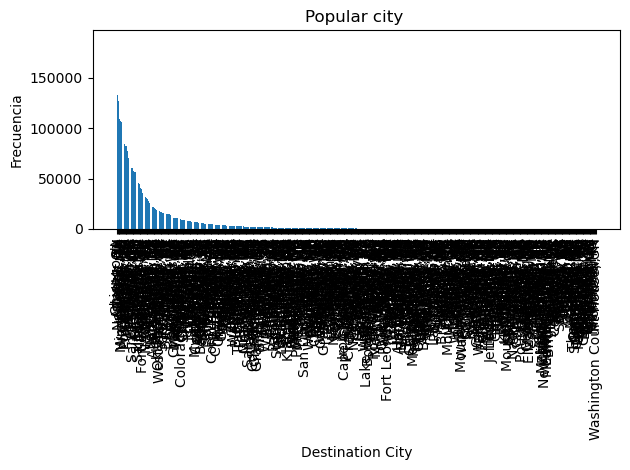

In [2]:
#Destination Frequency
city_counts = df['Destination_city'].value_counts()

# Obtener la ciudad más concurrida
most_popular_city = city_counts.idxmax()

# Create Bar Plots
plt.bar(city_counts.index, city_counts.values)
plt.xlabel('Destination City')
plt.ylabel('Frecuencia')
plt.title('Popular city ')
plt.xticks(rotation=90)
plt.tight_layout()

# Destacar la ciudad más concurrida
for i, city in enumerate(city_counts.index):
    if city == most_popular_city:
        plt.bar(city, city_counts.values[i], color='red')

# Mostrar el gráfico
plt.show()

In [3]:
top_20_cities = df['Destination_city'].value_counts().head(20)
top_20_cities.head(20)




Chicago, IL          187941
Atlanta, GA          132883
Dallas, TX           126784
New York, NY         109223
Detroit, MI          106879
Houston, TX          105905
Minneapolis, MN       98605
Washington, DC        94307
Charlotte, NC         85069
Los Angeles, CA       84077
Philadelphia, PA      82517
Newark, NJ            82418
St. Louis, MO         77207
Phoenix, AZ           70691
Memphis, TN           69893
Pittsburgh, PA        69764
Orlando, FL           64876
Cincinnati, OH        60817
Las Vegas, NV         60657
San Francisco, CA     57188
Name: Destination_city, dtype: int64

Text(0.5, 1.0, 'Top 10 Cities')

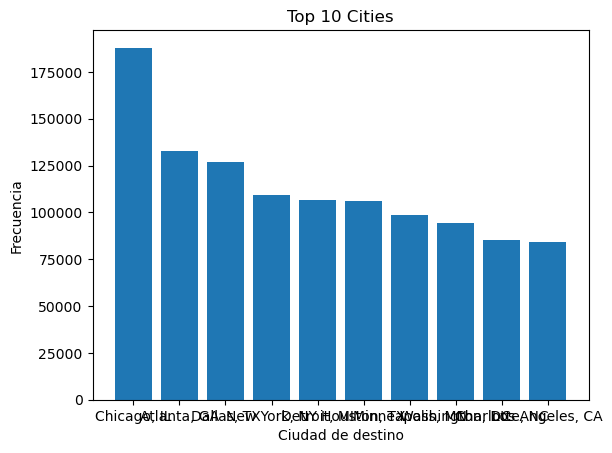

In [4]:
top_10_cities = df['Destination_city'].value_counts().head(10)
plt.bar(top_10_cities.index, top_10_cities.values)
plt.xlabel('Ciudad de destino')
plt.ylabel('Frecuencia')
plt.title('Top 10 Cities')

          

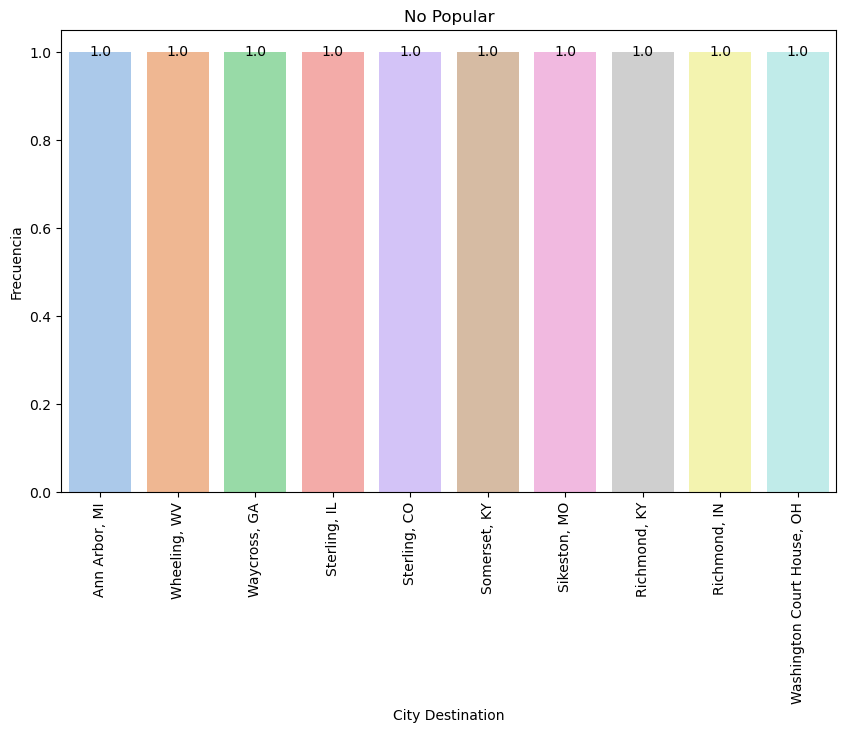

In [5]:
bottom_10_cities = df['Destination_city'].value_counts().tail(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico

# Utilizar una paleta de colores diferente
colors = sns.color_palette('pastel')

# Personalizar los ejes y los colores
ax = sns.barplot(x=bottom_10_cities.index, y=bottom_10_cities.values, palette=colors)

# Rotar las etiquetas del eje x para mejorar la legibilidad
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Agregar etiquetas a las barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# Títulos y etiquetas de los ejes
plt.xlabel('City Destination')
plt.ylabel('Frecuencia')
plt.title('No Popular')

# Mostrar el gráfico
plt.show()


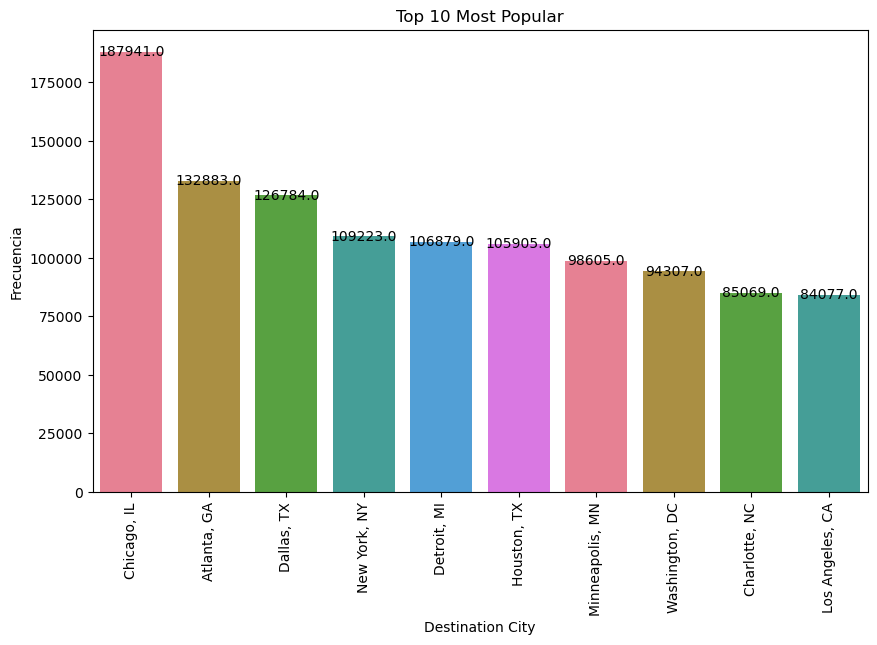

In [6]:
top_10_cities = df['Destination_city'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico

# Utilizar una paleta de colores diferente
colors = sns.color_palette('husl')

# Personalizar los ejes y los colores
ax = sns.barplot(x=top_10_cities.index, y=top_10_cities.values, palette=colors)

# Rotar las etiquetas del eje x para mejorar la legibilidad
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Agregar etiquetas a las barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# Títulos y etiquetas de los ejes
plt.xlabel('Destination City')
plt.ylabel('Frecuencia')
plt.title('Top 10 Most Popular')

# Mostrar el gráfico
plt.show()

In [7]:
top_10_origin_cities = df['Origin_city'].value_counts().head(10)

# Imprimir las 10 ciudades de origen con mayor demanda
print("Top 10 Ciudades de origen con mayor demanda:")
print(top_10_origin_cities)


Top 10 Ciudades de origen con mayor demanda:
Chicago, IL        186312
Atlanta, GA        131109
Dallas, TX         122835
Detroit, MI        108207
New York, NY       105732
Houston, TX        102901
Minneapolis, MN     98952
Washington, DC      94977
Los Angeles, CA     87299
Charlotte, NC       85615
Name: Origin_city, dtype: int64


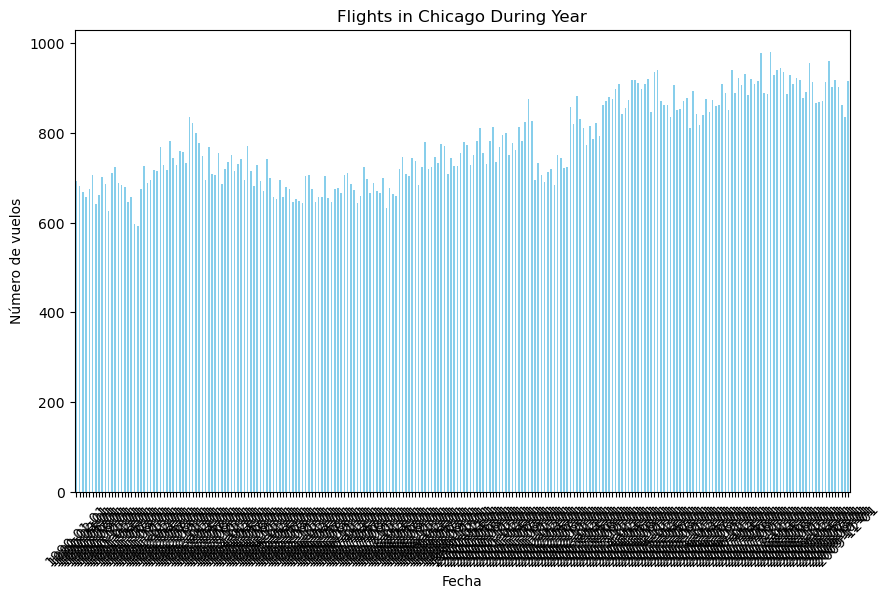

In [8]:
chicago_flights = df[df['Origin_city'] == 'Chicago, IL']

# Contar el número de vuelos por fecha
flight_counts = chicago_flights['Fly_date'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
flight_counts.plot(kind='bar', color='skyblue')

# Personalizar el gráfico
plt.title('Flights in Chicago During Year')
plt.xlabel('Fecha')
plt.ylabel('Número de vuelos')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [48]:
df_sorted = df.sort_values('Fly_date', ascending=False)

In [ ]:

#FUTURE PREDICTIONS



#Based on the numbers you provided, it appears that you are referring to population figures for various cities in the United States. 
#Here are a few predictions based on those numbers:

#Population growth: Cities with larger populations, such as Chicago, Atlanta, Dallas, and New York, are likely to experience continued population growth in the coming years. 
#this growth may be due to factors such as job opportunities, cultural attractions, and quality of life.
    
#Economic influence: Cities like New York, Chicago, and San Francisco, with their high population numbers, are expected to maintain their status as major economic centers. 
#These cities are likely to continue attracting businesses and investments, driving economic growth.

#Urban development: Growing cities such as Charlotte, Houston, and Phoenix may witness increased urban development, including the construction of new infrastructure, housing, 
# and commercial spaces, to accommodate their expanding populations.
    
    
#Tourism: Cities like Orlando and Las Vegas, known for their tourism industry, are likely to continue attracting visitors from around the world. 
#They may invest in further developing their tourism infrastructure and diversifying their attractions to cater to changing travel trends.

#Transportation: Cities with high population figures, such as New York and Chicago, may invest in improving their transportation systems to handle the increasing demand. 
#This could involve upgrades to public transportation, expansion of airports, and implementation of new transportation technologies.
    
#Please note that these predictions are based on general trends and assumptions, and actual outcomes may vary due to a wide range of factors. 
#Additionally, it's important to consider that these predictions are based solely on population numbers and do not take into account other variables such as economic conditions, social dynamics, or political factors.








In [12]:
# Cargar los datos desde tu tabla
data = pd.read_csv('/Users/edgarbermudez/Final Project/Airports2.csv')  # Reemplaza 'tu_archivo.csv' con la ruta a tu archivo

# Seleccionar las características y la variable objetivo
features = ['Seats', 'Flights', 'Distance', 'Origin_population', 'Destination_population']
target = 'Passengers'

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Preparar los datos de entrenamiento
X_train = train_data[features]
y_train = train_data[target]

# Crear y entrenar el modelo de regresión
model = LinearRegression()
model.fit(X_train, y_train)

# Preparar los datos de prueba
X_test = test_data[features]
y_test = test_data[target]

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) en las predicciones
mse = mean_squared_error(y_test, predictions)
print(f"Error cuadrático medio: {mse}")






Error cuadrático medio: 1069160.9865781483


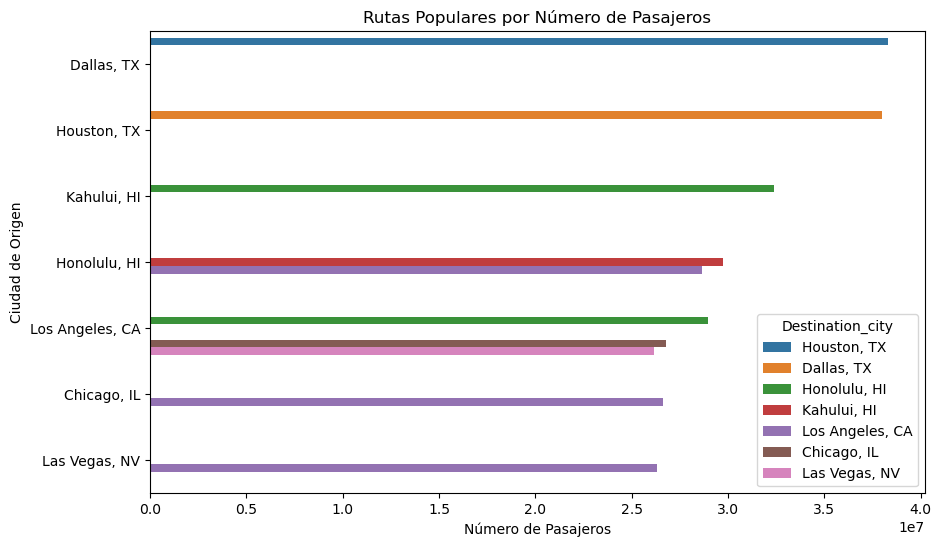

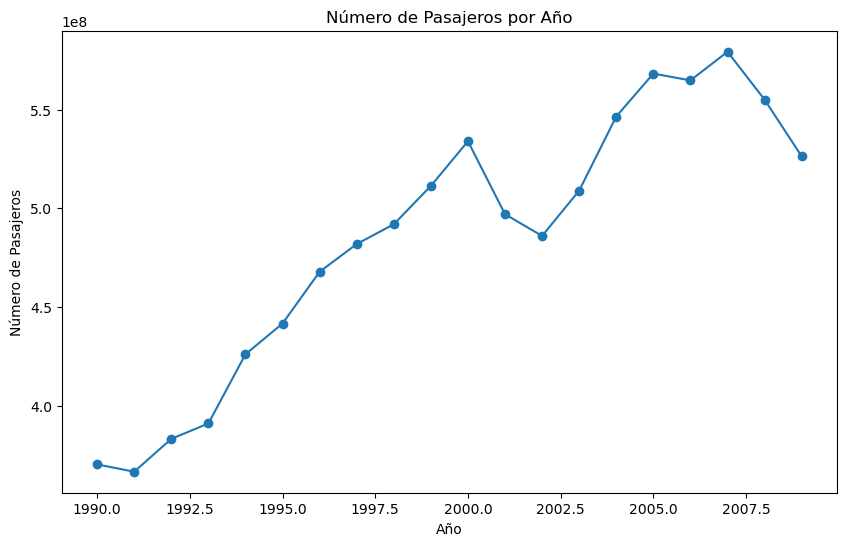

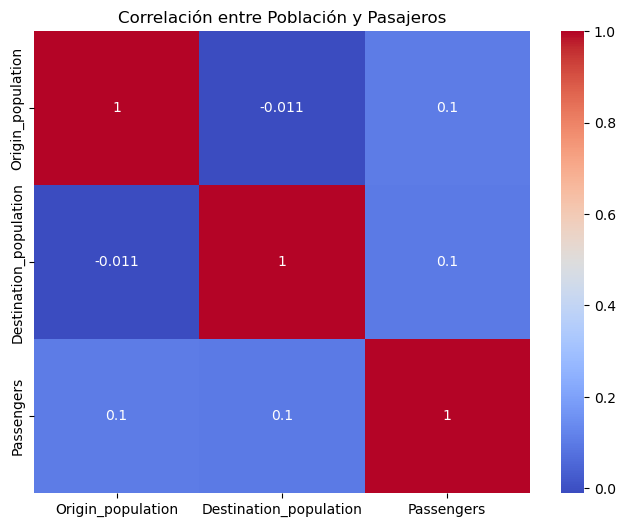

In [13]:

# Cargar el conjunto de datos
df = pd.read_csv('/Users/edgarbermudez/Final Project/Airports2.csv')  # Asegúrate de reemplazar 'tu_archivo.csv' con el nombre real del archivo

# Análisis de Rutas Populares
popular_routes = data.groupby(['Origin_city', 'Destination_city']).agg({'Passengers': 'sum', 'Flights': 'sum'}).reset_index()
popular_routes = popular_routs.sort_values(by='Passengers', ascending=False).head(10)

# Gráfico de barras de rutas populares
plt.figure(figsize=(10, 6))
sns.barplot(data=popular_routes, x='Passengers', y='Origin_city', hue='Destination_city')
plt.title('Rutas Populares por Número de Pasajeros')
plt.xlabel('Número de Pasajeros')
plt.ylabel('Ciudad de Origen')
plt.show()

# Análisis Temporal
data['Fly_date'] = pd.to_datetime(data['Fly_date'])
data['Year'] = data['Fly_date'].dt.year
yearly_passengers = data.groupby('Year')['Passengers'].sum()

# Gráfico de línea de pasajeros anuales
plt.figure(figsize=(10, 6))
yearly_passengers.plot(marker='o')
plt.title('Número de Pasajeros por Año')
plt.xlabel('Año')
plt.ylabel('Número de Pasajeros')
plt.show()

# Correlaciones Demográficas
correlation = data[['Origin_population', 'Destination_population', 'Passengers']].corr()

# Mapa de calor de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlación entre Población y Pasajeros')
plt.show()

In [16]:


df = pd.read_csv('/Users/edgarbermudez/Final Project/Airports2.csv')

# Seleccionar características relevantes y la variable objetivo
features = ['Flights', 'Distance', 'Origin_population', 'Destination_population']
target = 'Passengers'

X = data[features]
y = data[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 5749399.55
R-squared: 0.70


Mean Squared Error: 4368434.36
R-squared: 0.77


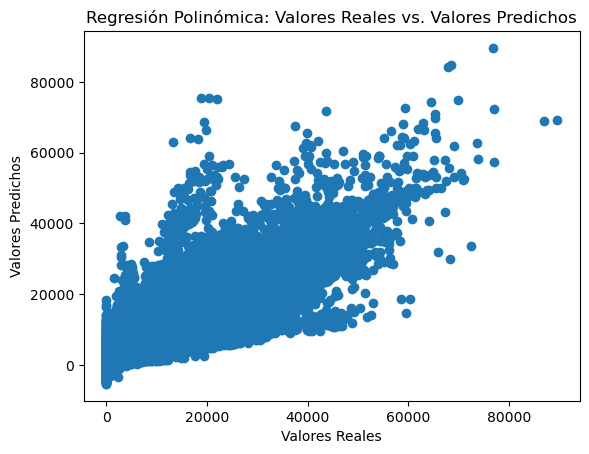

In [19]:
features = ['Flights', 'Distance', 'Origin_population', 'Destination_population']
target = 'Passengers'

X = data[features]
y = data[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar regresión polinómica de grado 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_poly)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Graficar resultados
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión Polinómica: Valores Reales vs. Valores Predichos')
plt.show()

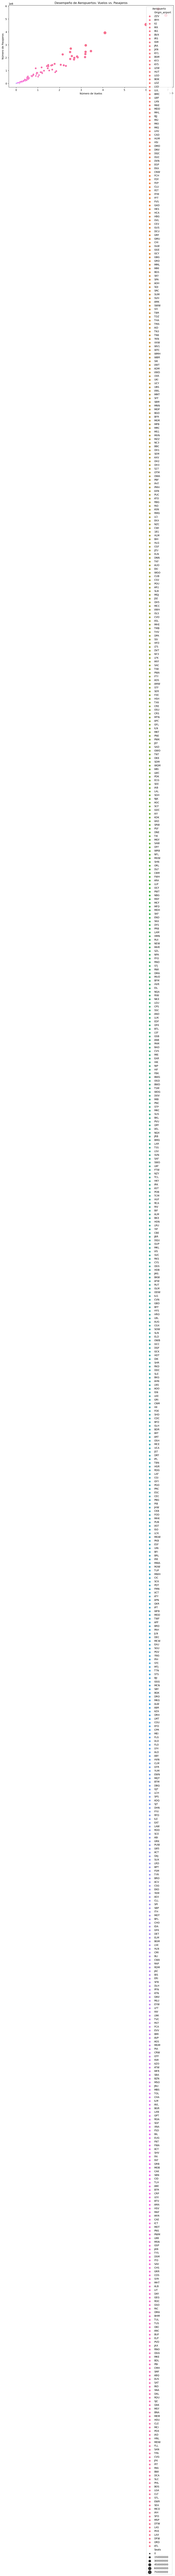

In [21]:

# Calcular el total de pasajeros y vuelos por aeropuerto
airport_performance = data.groupby('Origin_airport').agg({'Flights': 'sum', 'Passengers': 'sum', 'Seats': 'sum'}).reset_index()

# Ordenar aeropuertos por la cantidad de pasajeros
airport_performance = airport_performance.sort_values(by='Passengers', ascending=True)

# Graficar el desempeño de los aeropuertos
plt.figure(figsize=(12, 6))
sns.scatterplot(data=airport_performance, x='Flights', y='Passengers', size='Seats', sizes=(20, 200), hue='Origin_airport')
plt.title('Desempeño de Aeropuertos: Vuelos vs. Pasajeros')
plt.xlabel('Número de Vuelos')
plt.ylabel('Número de Pasajeros')
plt.legend(title='Aeropuerto')
plt.show()

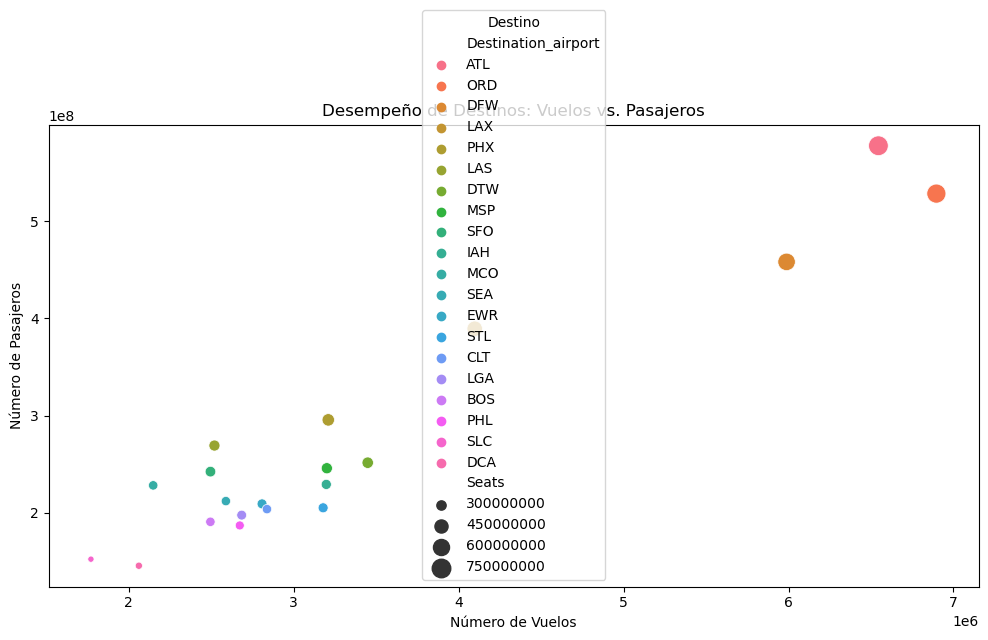

In [22]:
# Calcular el total de pasajeros, vuelos y asientos por destino
destination_performance = data.groupby('Destination_airport').agg({'Flights': 'sum', 'Passengers': 'sum', 'Seats': 'sum'}).reset_index()

# Ordenar destinos por la cantidad de pasajeros
destination_performance = destination_performance.sort_values(by='Passengers', ascending=False).head(20)

# Graficar el desempeño de los destinos
plt.figure(figsize=(12, 6))
sns.scatterplot(data=destination_performance, x='Flights', y='Passengers', size='Seats', sizes=(20, 200), hue='Destination_airport')
plt.title('Desempeño de Destinos: Vuelos vs. Pasajeros')
plt.xlabel('Número de Vuelos')
plt.ylabel('Número de Pasajeros')
plt.legend(title='Destino')
plt.show()
